# Import data set

$T_\text{g}$ ... Glass transition temperature  
$\alpha$ ... Coefficient of thermal expansion (CTE) for polymer in its glassy state 
#### Empirical rule (Boyer-Spencer [1])

$\alpha T_\text{g} = 0.08$

[1] R. Simha and R.F. Boyer, J. Chem. Phys., 37, 1003 (1962)


In [1]:
import pandas as pd
df = pd.read_pickle('dataset.pkl')
df

,polymer,abb,alpha_exp,Tg,smiles
0,Poly(butyl methacrylate),PBMA,0.000207,294,*CC(*)(C)C(=O)OCCC
1,Poly(dimethyl siloxane),PDMS,0.000302,149,*O[Si](*)(C)C
2,Poly(ethyl methacrylate),PEMA,0.000090,338,*CC(*)(C)C(=O)OCC
3,Polyisobutylene,PIB,0.000183,202,*CC(*)(C)C
4,Poly(methyl methacrylate),PMMA,0.000060,317,*CC(*)(C)C(=O)OC
5,Polyamide6,PA6,0.000085,325,*CCCCCC(=O)N*
6,Polyacrylonitrile,PAN,0.000065,383,*CC(*)C#N
7,Poly(caprolactone),PCL,0.000165,207,*CCCCCC(=O)O*
8,Poly(chlorotrifluoroethylene),PCTFE,0.000055,360,*C(F)(F)C(*)(F)Cl
9,Poly(ether ether ketone),PEEK,0.000077,421,*Oc1ccc(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)cc1C(C)(C)C


,polymer,abb,alpha_exp,Tg,smiles,alpha_bs
0,Poly(butyl methacrylate),PBMA,0.000207,294,*CC(*)(C)C(=O)OCCC,0.000272
1,Poly(dimethyl siloxane),PDMS,0.000302,149,*O[Si](*)(C)C,0.000537
2,Poly(ethyl methacrylate),PEMA,0.000090,338,*CC(*)(C)C(=O)OCC,0.000237
3,Polyisobutylene,PIB,0.000183,202,*CC(*)(C)C,0.000396
4,Poly(methyl methacrylate),PMMA,0.000060,317,*CC(*)(C)C(=O)OC,0.000252
5,Polyamide6,PA6,0.000085,325,*CCCCCC(=O)N*,0.000246
6,Polyacrylonitrile,PAN,0.000065,383,*CC(*)C#N,0.000209
7,Poly(caprolactone),PCL,0.000165,207,*CCCCCC(=O)O*,0.000386
8,Poly(chlorotrifluoroethylene),PCTFE,0.000055,360,*C(F)(F)C(*)(F)Cl,0.000222
9,Poly(ether ether ketone),PEEK,0.000077,421,*Oc1ccc(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)cc1C(C)(C)C,0.000190


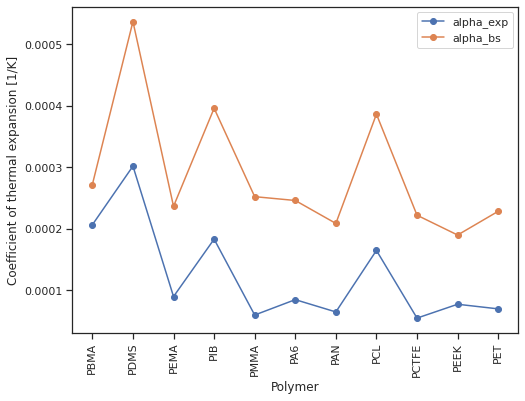

In [2]:
# White box model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")

f, ax = plt.subplots(1,1)

df['alpha_bs'] = 0.08/df.Tg

df = df.copy()
df.alpha_bs = df.alpha_bs
df.alpha_exp = df.alpha_exp

df.plot(x='abb', y=['alpha_exp',  'alpha_bs'], kind='line', style='o-', rot=90, figsize=(8, 6), 
ylabel='Coefficient of thermal expansion [1/K]', xlabel='Polymer', ax=ax)

ax.set_xticks(range(len(df.abb.tolist())), df.abb.tolist())
df


<AxesSubplot:xlabel='1/Tg [1/K]', ylabel='measured CTE [1/K]'>

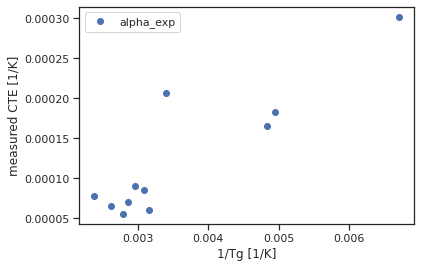

In [3]:
# Tg vs measured CTE
df['1/Tg'] = 1/df.Tg
df.plot(x='1/Tg', y='alpha_exp', style='o', xlabel='1/Tg [1/K]', ylabel='measured CTE [1/K]')

## Gray box model

We assume the linear relationship between Tg and CTE; this makes it a gray box model


p2 = -7.091e-05 is close to zero
p1 = 0.054; alpha = 0.054 / Tg


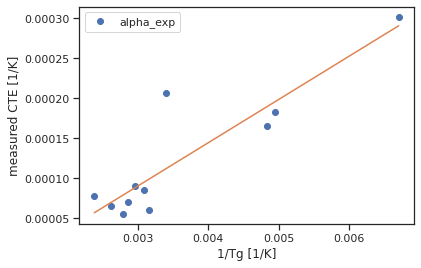

In [4]:
import numpy as np

# minimize alpha_exp = p1 / Tg + p2
# p1 and p2 are parameters
# x = 1/Tg, y = alpha_exp
z = np.polyfit(df["1/Tg"], df.alpha_exp, 1)
fn = np.poly1d(z)

f, ax = plt.subplots(1, 1)
df.plot(
    x="1/Tg",
    y="alpha_exp",
    style="o",
    xlabel="1/Tg [1/K]",
    ylabel="measured CTE [1/K]",
    ax=ax,
)
xp = np.linspace(df["1/Tg"].min(), df["1/Tg"].max(), 100)
ax.plot(xp, fn(xp), "-")
# print(z)

print(f"p2 = {z[1]:.3e} is close to zero")
print(f"p1 = {z[0]:.3f}; alpha = {z[0]:.3f} / Tg")


,polymer,abb,alpha_exp,Tg,smiles,alpha_bs,1/Tg,alpha_gray
0,Poly(butyl methacrylate),PBMA,0.000207,294,*CC(*)(C)C(=O)OCCC,0.000272,0.003401,0.000183
1,Poly(dimethyl siloxane),PDMS,0.000302,149,*O[Si](*)(C)C,0.000537,0.006711,0.000362
2,Poly(ethyl methacrylate),PEMA,0.000090,338,*CC(*)(C)C(=O)OCC,0.000237,0.002959,0.000159
3,Polyisobutylene,PIB,0.000183,202,*CC(*)(C)C,0.000396,0.004950,0.000267
4,Poly(methyl methacrylate),PMMA,0.000060,317,*CC(*)(C)C(=O)OC,0.000252,0.003155,0.000170
5,Polyamide6,PA6,0.000085,325,*CCCCCC(=O)N*,0.000246,0.003077,0.000166
6,Polyacrylonitrile,PAN,0.000065,383,*CC(*)C#N,0.000209,0.002611,0.000141
7,Poly(caprolactone),PCL,0.000165,207,*CCCCCC(=O)O*,0.000386,0.004831,0.000260
8,Poly(chlorotrifluoroethylene),PCTFE,0.000055,360,*C(F)(F)C(*)(F)Cl,0.000222,0.002778,0.000150
9,Poly(ether ether ketone),PEEK,0.000077,421,*Oc1ccc(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)cc1C(C)(C)C,0.000190,0.002375,0.000128


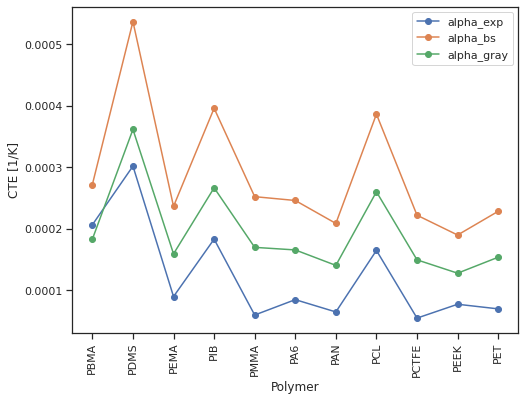

In [9]:
# test plot
f, ax = plt.subplots(1, 1)

df["alpha_gray"] = z[0] / df.Tg

df.plot(
    x="abb",
    y=[ "alpha_exp", "alpha_bs", "alpha_gray",],
    kind="line",
    style="o-",
    rot=90,
    figsize=(8, 6),
    ylabel="CTE [1/K]",
    xlabel="Polymer",
    ax=ax,
)
ax.set_xticks(range(len(df.abb.tolist())), df.abb.tolist())
df
